### 1. 데이터 로드 및 전처리

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./data/Fault_data.csv",encoding="EUC-KR")
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

In [3]:
print("==== 수치 변화가 아예 없는 변수 제거 ====")
for i in data.columns:
    if len(data[i].unique())==1:
        data = data.drop([i],axis=1)
        print(i)

==== 수치 변화가 아예 없는 변수 제거 ====
CROT.STDDEV0
CROT.RANGE0
CROT.STDDEV1
CROT.RANGE1
CROT.STDDEV13
CROT.RANGE13
CROT.STDDEV5
CROT.RANGE5
CROT.STDDEV11
CROT.RANGE11
CROT.STDDEV10
CROT.RANGE10
CROT.STDDEV7
CROT.RANGE7
CROT.STDDEV14
CROT.RANGE14
CROT.STDDEV12
CROT.RANGE12
CROT.STDDEV9
CROT.RANGE9


In [4]:
#X,Y 분할
Y = data["Y"].copy()
X = data.drop("Y",axis=1)
X.head(3)

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.MEAN0,TAE.STDDEV1,TAE.MEAN1,...,PC.STDDEV12,PC.MEAN12,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.MEAN9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,35,0.121240,38.055619,...,3.821034,57.645580,17.350926,0.032832,35.011650,0.127077,35,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,27,0.115462,38.016088,...,0.303504,56.613882,1.466280,0.020858,35.550245,0.063540,27,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,15,0.119149,38.029244,...,2.845739,57.296468,13.098728,0.021635,36.013373,0.063538,15,0.161640,45.071393,0.977516


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20230629)
X_train.columns

Index(['CHAMBER', 'TAE.STDDEV0', 'TAE.MEAN0', 'TAE.RANGE0', 'PC.STDDEV0',
       'PC.MEAN0', 'PC.RANGE0', 'CROT.MEAN0', 'TAE.STDDEV1', 'TAE.MEAN1',
       ...
       'PC.STDDEV12', 'PC.MEAN12', 'PC.RANGE12', 'TAE.STDDEV9', 'TAE.MEAN9',
       'TAE.RANGE9', 'CROT.MEAN9', 'PC.STDDEV9', 'PC.MEAN9', 'PC.RANGE9'],
      dtype='object', length=116)

### 2. 상관계수를 통한 다중공선성 확인

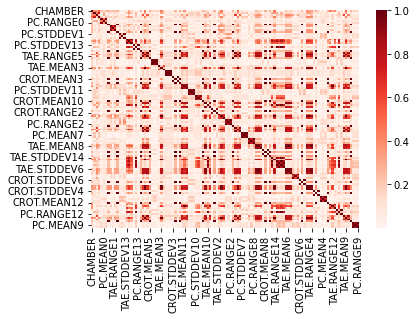

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(abs(X.corr()),cmap ='Reds')
plt.show()

In [7]:
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

In [8]:
#성능 확인
LM_model = LinearRegression()
LM_model.fit(X_train, Y_train)
pred = LM_model.predict(X_test)
print_all_reg(Y_test, pred)

model의 MSE 값은 197038.144
model의 MAE 값은 238.459
model의 r2 값은 -59.909


### 3. MRMR 적용 및 다중공선성 확인
- !pip install -U pymrmr

In [9]:
import pymrmr

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
X_train.columns

Index(['CHAMBER', 'TAE.STDDEV0', 'TAE.MEAN0', 'TAE.RANGE0', 'PC.STDDEV0',
       'PC.MEAN0', 'PC.RANGE0', 'CROT.MEAN0', 'TAE.STDDEV1', 'TAE.MEAN1',
       ...
       'PC.STDDEV12', 'PC.MEAN12', 'PC.RANGE12', 'TAE.STDDEV9', 'TAE.MEAN9',
       'TAE.RANGE9', 'CROT.MEAN9', 'PC.STDDEV9', 'PC.MEAN9', 'PC.RANGE9'],
      dtype='object', length=116)

In [11]:
# Second parameter : Feature Selection method MIQ” or “MID”;
# MID (Mutual Information Difference criterion) and MIQ (Mutual Information Quotient criterion)
# Third parameter defines the number of features that should be selected by the algorithm.

print(pymrmr.mRMR(data,'MID', 10))
print(pymrmr.mRMR(data,'MIQ', 10))
use_col = pymrmr.mRMR(data,'MIQ', 14)

['CROT.MEAN14', 'PC.RANGE3', 'PC.RANGE2', 'PC.RANGE13', 'PC.RANGE1', 'CROT.MEAN3', 'PC.RANGE12', 'PC.RANGE9', 'CROT.MEAN11', 'PC.RANGE11']
['CROT.MEAN14', 'PC.STDDEV2', 'PC.MEAN3', 'PC.MEAN6', 'PC.MEAN4', 'PC.STDDEV7', 'PC.STDDEV13', 'PC.MEAN10', 'PC.MEAN8', 'PC.STDDEV1']


In [12]:
#성능 확인
LM_model = LinearRegression()
LM_model.fit(X_train[use_col], Y_train)
pred = LM_model.predict(X_test[use_col])
print_all_reg(Y_test, pred)

model의 MSE 값은 1152.318
model의 MAE 값은 27.380
model의 r2 값은 0.627


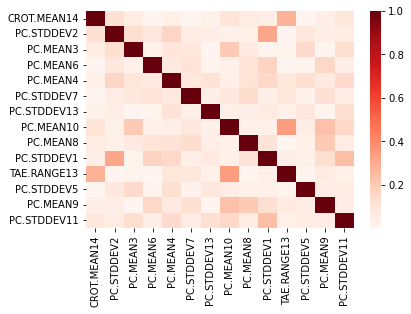

In [13]:
sns.heatmap(abs(X[use_col].corr()),cmap ='Reds')
plt.show()

### 4. Boruta 적용 및 다중공선성 확인
- !pip install Boruta

In [14]:
from boruta import BorutaPy

In [15]:
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X=data.drop(["Y"],axis=1)
Y=data["Y"].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)
X_train.columns

Index(['CHAMBER', 'TAE.STDDEV0', 'TAE.MEAN0', 'TAE.RANGE0', 'PC.STDDEV0',
       'PC.MEAN0', 'PC.RANGE0', 'CROT.MEAN0', 'TAE.STDDEV1', 'TAE.MEAN1',
       ...
       'PC.STDDEV12', 'PC.MEAN12', 'PC.RANGE12', 'TAE.STDDEV9', 'TAE.MEAN9',
       'TAE.RANGE9', 'CROT.MEAN9', 'PC.STDDEV9', 'PC.MEAN9', 'PC.RANGE9'],
      dtype='object', length=116)

In [16]:
X_arr = X.values
Y_arr = Y.ravel()

from sklearn.ensemble import RandomForestRegressor

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_jobs=-1, max_depth=10)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=2)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_arr, Y_arr)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	116
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	93
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	20
Rejected: 	93
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	20
Rejected: 	93
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	20
Rejected: 	93
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	11
Rejected: 	101
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	11
Rejected: 	101
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	11
Rejected: 	101
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	11
Rejected: 	101
Iteration: 	16 / 100
Confirmed: 	4
Tentative:

BorutaPy(estimator=RandomForestRegressor(max_depth=10, n_estimators=52,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x1A4DFBDA440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1A4DFBDA440, verbose=2)

In [17]:
# check selected features - first 5 features are selected
print(feat_selector.support_)
# check ranking of features
print(feat_selector.ranking_)
# call transform() on X to filter it down to selected features
print(feat_selector.transform(X_arr))
boruta_use_col = feat_selector.ranking_[:25]
boruta_use_col

[False False False False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[ 98  31  43  85  17  54  92  16  36  61  74   2  21   1  67   1  19  26
  85  72  82  16  23   6  85  11  34  32  25  49  38  71  80  23  65 106
   6 102   6  58  33   1  43  64  53  44  51  67   8  36   1  40 100  13
 101  58  28  89  55  64  67  12  53   1  20  88  85  94  79  60  73  45
 

array([98, 31, 43, 85, 17, 54, 92, 16, 36, 61, 74,  2, 21,  1, 67,  1, 19,
       26, 85, 72, 82, 16, 23,  6, 85])

In [18]:
#성능 확인
LM_model = LinearRegression()
LM_model.fit(X_train.loc[:,feat_selector.ranking_<4],Y_train)
pred=LM_model.predict(X_test.loc[:,feat_selector.ranking_<5])
print_all_reg(Y_test,pred)

model의 MSE 값은 1498.614
model의 MAE 값은 28.551
model의 r2 값은 0.515


In [19]:
use_col = X_train.columns[feat_selector.ranking_<5]

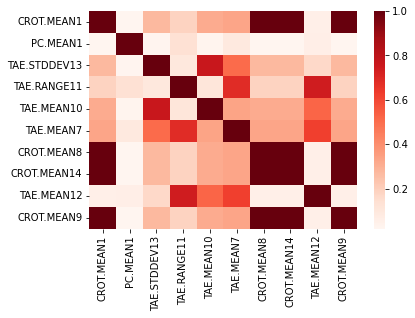

In [20]:
sns.heatmap(abs(data[use_col].corr()),cmap ='Reds')
plt.show()

### 4. All But X 적용 및 다중공선성 확인

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
def lr_score(X_train, X_test, Y_train, Y_test):
    LM_model = LinearRegression()
    LM_model.fit(X_train,Y_train)
    pred = LM_model.predict(X_test)
    return r2_score(Y_test, pred)

In [23]:
def rf_score(X_train, X_test, Y_train, Y_test):
    LM_model = RandomForestRegressor()
    LM_model.fit(X_train,Y_train)
    pred = LM_model.predict(X_test)
    return r2_score(Y_test, pred)

In [24]:
def all_but_x(X, Y):
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=30)
    use_col = list(X.columns)
    for col in list(X.columns):
        before = lr_score(X_train[use_col],X_valid[use_col],Y_train,Y_valid)
        use_col.remove(col)
        after = lr_score(X_train[use_col],X_valid[use_col],Y_train,Y_valid)
        
        if before >= after:
            use_col.append(col)
        else:
            print(col +'제거')
            continue
        
    return use_col 

In [25]:
allbutx_col = all_but_x(X_train, Y_train)

TAE.STDDEV0제거
TAE.RANGE0제거
PC.MEAN0제거
CROT.MEAN1제거
TAE.RANGE13제거
PC.MEAN13제거
TAE.RANGE5제거
CROT.MEAN5제거
PC.MEAN5제거
TAE.MEAN3제거
CROT.STDDEV3제거
CROT.MEAN3제거
CROT.RANGE3제거
PC.STDDEV11제거
PC.STDDEV10제거
PC.RANGE10제거
TAE.STDDEV10제거
TAE.MEAN10제거
TAE.RANGE10제거
TAE.STDDEV2제거
TAE.MEAN2제거
TAE.RANGE2제거
PC.STDDEV2제거
TAE.STDDEV7제거
PC.RANGE8제거
CROT.STDDEV8제거
CROT.RANGE8제거
PC.STDDEV14제거
TAE.STDDEV6제거
TAE.RANGE6제거
CROT.MEAN6제거
CROT.RANGE6제거
TAE.STDDEV4제거
CROT.STDDEV4제거
CROT.RANGE4제거
PC.MEAN4제거
CROT.MEAN12제거
TAE.MEAN12제거
TAE.STDDEV9제거
CROT.MEAN9제거
PC.STDDEV9제거


In [26]:
len(allbutx_col)

75

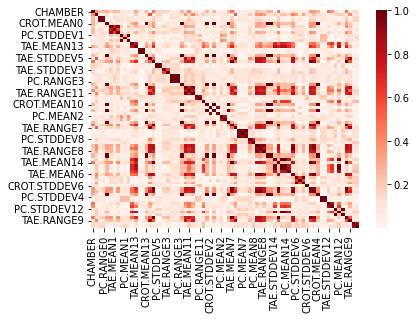

In [27]:
sns.heatmap(abs(X[allbutx_col].corr()),cmap ='Reds')
plt.show()

In [28]:
#성능 확인
LM_model = LinearRegression()
LM_model.fit(X_train[allbutx_col],Y_train)
pred = LM_model.predict(X_test[allbutx_col])
print_all_reg(Y_test, pred)

model의 MSE 값은 18354.967
model의 MAE 값은 104.333
model의 r2 값은 -4.936


In [29]:
def all_but_x(X, Y):
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=30)
    use_col = list(X.columns)
    for col in list(X.columns):
        before = rf_score(X_train[use_col],X_valid[use_col],Y_train,Y_valid)
        use_col.remove(col)
        after = rf_score(X_train[use_col],X_valid[use_col],Y_train,Y_valid)
        
        if before >= after:
            use_col.append(col)
        else:
            print(col +'제거')
            continue
        
    return use_col 

In [30]:
allbutx_col = all_but_x(X_train, Y_train)

TAE.STDDEV0제거
TAE.MEAN0제거
TAE.RANGE0제거
PC.STDDEV0제거
PC.MEAN0제거
CROT.MEAN0제거
TAE.STDDEV1제거
CROT.MEAN1제거
PC.STDDEV1제거
PC.MEAN1제거
TAE.STDDEV13제거
TAE.MEAN13제거
TAE.RANGE13제거
PC.MEAN13제거
PC.RANGE13제거
CROT.MEAN13제거
TAE.STDDEV5제거
TAE.MEAN5제거
TAE.RANGE5제거
CROT.MEAN5제거
PC.STDDEV5제거
TAE.RANGE3제거
PC.RANGE3제거
TAE.MEAN11제거
PC.MEAN10제거
PC.RANGE10제거
CROT.MEAN10제거
TAE.STDDEV10제거
TAE.MEAN10제거
TAE.RANGE10제거
CROT.MEAN2제거
TAE.RANGE2제거
PC.STDDEV2제거
PC.MEAN2제거
PC.RANGE2제거
CROT.MEAN7제거
TAE.STDDEV7제거
PC.MEAN7제거
PC.RANGE7제거
PC.STDDEV8제거
TAE.MEAN8제거
CROT.RANGE8제거
CROT.MEAN14제거
TAE.RANGE14제거
PC.MEAN14제거
PC.MEAN6제거
TAE.STDDEV4제거
TAE.MEAN4제거
CROT.MEAN4제거
PC.STDDEV4제거
CROT.MEAN12제거
TAE.STDDEV12제거
TAE.RANGE12제거
PC.STDDEV12제거
PC.RANGE12제거
TAE.MEAN9제거
PC.RANGE9제거


In [31]:
len(allbutx_col)

59

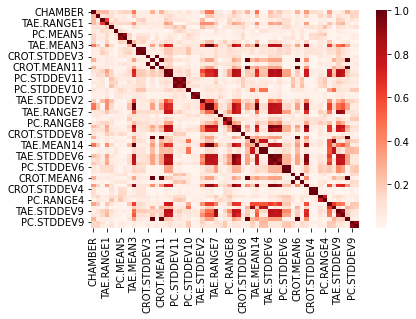

In [32]:
sns.heatmap(abs(X[allbutx_col].corr()),cmap ='Reds')
plt.show()

In [33]:
#성능 확인
RF_model = RandomForestRegressor()
RF_model.fit(X_train[allbutx_col], Y_train)
pred = RF_model.predict(X_test[allbutx_col])
print_all_reg(Y_test, pred)

model의 MSE 값은 1234.726
model의 MAE 값은 25.498
model의 r2 값은 0.601


In [34]:
#성능 확인
RF_model = RandomForestRegressor()
RF_model.fit(X_train, Y_train)
pred = RF_model.predict(X_test)
print_all_reg(Y_test, pred)

model의 MSE 값은 1102.247
model의 MAE 값은 24.176
model의 r2 값은 0.644


### 5. PCA 적용 및 다중공선성 확인

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

In [36]:
from sklearn.decomposition import PCA
import numpy as np
#Components 2로 설정
pca_model=PCA(n_components=10)
#pca_model=PCA(n_components=0.1)

X_train_pca=pca_model.fit_transform(X_train)
X_test_pca=pca_model.transform(X_test)
pca_model.explained_variance_ratio_ #설명된 분산의 비율
np.cumsum(pca_model.explained_variance_ratio_)
PCR_model=LinearRegression()
PCR_model.fit(X_train_pca, Y_train)
pred=PCR_model.predict(X_test_pca)
print_all_reg(Y_test, pred)

model의 MSE 값은 1313.245
model의 MAE 값은 27.278
model의 r2 값은 0.575


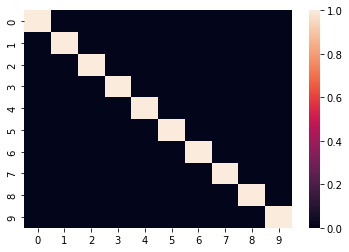

In [37]:
sns.heatmap(np.corrcoef(X_train_pca.T))
plt.show()

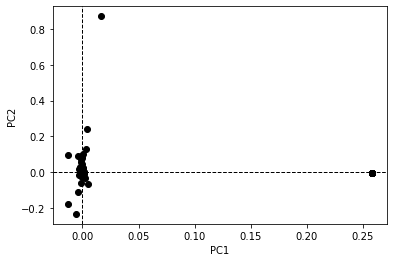

7

In [38]:
from matplotlib import pyplot as plt

annotations=['X{}'.format(i+1) for i in range(len(pca_model.components_[0]))]
#annotations=X_train.columns
plt.scatter(pca_model.components_[0],pca_model.components_[1],color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=0, color='black', linewidth=1, linestyle='--')
#for i, label in enumerate(annotations):
#    plt.annotate(label, (pca_model.components_[0][i], pca_model.components_[1][i]),)
plt.show()
np.argmax(pca_model.components_[0])

In [39]:
pca_model.components_.shape

(10, 116)

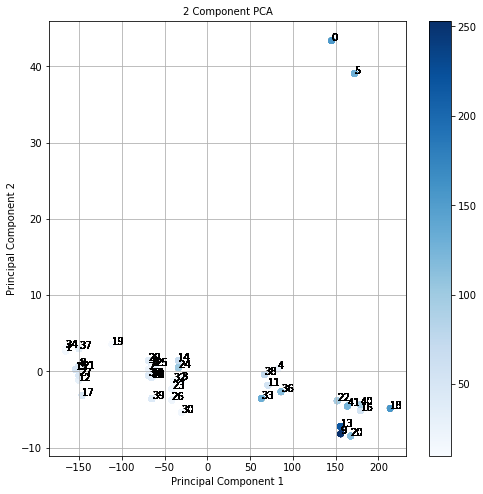

In [40]:
# Score plot -  데이터들(row)을 잠재 변수 공간 (pc1, pc2)로 매핑시킨 scatter plot 
# 관측치들이 서로 얼마나 밀접해있는지 파악 가능.(클러스터링 측면)
# 멀리 떨어져있는 관측치 발견 가능 (outlier확인)

from matplotlib import pyplot as plt
labels = Y_test

plt.figure(figsize = (8,8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA', fontsize = 10)

for label in labels:
    
    #indicesToKeep = finalDataFrame['label'] == label
    plt.scatter(X_test_pca[:,0]
               , X_test_pca[:,1]
               , c=labels
               , cmap='Blues'
               , s = 30)
    
    # anonoatation
    for i in range(len(X_test_pca)):
        plt.annotate(i,xy = (X_test_pca[i,0],X_test_pca[i,1]))

#plt.legend(labels)
plt.grid()
plt.colorbar()
plt.show()

### 추가) 적절한 K 탐색를 위한 PCA 함수 만들기

In [41]:
from sklearn.decomposition import PCA
def pca_module(data_x,data_y,how,pca_range):
    if how == "pca":
        print("PCA 진행")
        # 차원 축소된 score를 담을 리스트 생성
        pca_result = []
        
        X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=30)
        
        #모든 경우 테스트
        for num in pca_range:
            
            #n_compo 설정
            pca_model=PCA(n_components=num)
            
            #pca를 통한 데이터 변환
            X_train_pca=pca_model.fit_transform(X_train)
            X_test_pca=pca_model.transform(X_test)
            
            #성능 평가하기 (원하는 모델)
            LM_model=LinearRegression()
            LM_model.fit(X_train_pca,Y_train)
            pred=LM_model.predict(X_test_pca)
            
            #원하는 평가 방법 불러와서 사용하기
            score = mean_absolute_error(Y_test, pred)
            
            pca_result.append(score)
            
        #가장 좋은 결과 보여주기
        print("pca 가장 좋은 성능은:",np.min(pca_result))
        print("pca 가장 좋은 n의 경우:",pca_range[np.argmin(pca_result)])
    
    else:
        print("잘못 입력하셧습니다.")
    
    return

pca_module(X, Y, 'pca', [i for i in range(1, 100, 1)])

PCA 진행
pca 가장 좋은 성능은: 25.538038266762232
pca 가장 좋은 n의 경우: 17
